# Data Structures

- spaCy stores all shared data in a vocabulary, the Vocab.

- This includes words, but also the labels schemes for tags and entities.

- To save memory, all strings are encoded to hash IDs. If a word occurs more than once, we don't need to save it every time.

- Instead, spaCy uses a hash function to generate an ID and stores the string only once in the string store. The string store is available as `nlp.vocab.strings`.

- It's a lookup table that works in both directions. You can look up a string and get its hash, and look up a hash to get its string value. Internally, spaCy only communicates in hash IDs.

- Hash IDs can't be reversed, though. If a word is not in the vocabulary, there's no way to get its string. That's why we always need to pass around the shared vocab.


## Vocab, Lexemes and StringStore

- `Vocab`: stores data shared across multiple documents
- To save memory, spaCy encodes all strings to <b>hash values</b>
- Strings are only store once in the `StringStore` via `nlp.vocab.strings`
- String store: <b>lookup table</b> in both directions

In [1]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [2]:
nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings['coffee']
coffee_string = nlp.vocab.strings[coffee_hash]

In [3]:
len(nlp.vocab.strings)

84780

In [4]:
coffee_hash

3197928453018144401

In [5]:
coffee_string

'coffee'

- Hashes can't be reversed - that's why we need to provide the shared vocab

In [6]:
# Raises an error if we haven't seen the string before
string = nlp.vocab.strings[3197928453018144401]

In [7]:
string

'coffee'

- To get the hash for a string, we can look it up in `nlp.vocab.strings`.

- To get the string representation of a hash, we can look up the hash.

- A `Doc` object also exposes its vocab and string

- Look up the string and hash in `nlp.vocab.strings`

In [8]:
doc = nlp('I love coffee')

print("hash value:", nlp.vocab.strings['coffee'])
print("string value:", nlp.vocab.strings[3197928453018144401])

hash value: 3197928453018144401
string value: coffee


- The `doc` also exposes the vocab and strings

In [9]:
doc = nlp("I love coffee")
print("hash value: ", doc.vocab.strings['coffee'])

hash value:  3197928453018144401


## Lexemes: entries in the vocabulary

- Lexemes are context-independent entries in the vocabulary.

- You can get a lexeme by looking up a string or a hash ID in the vocab.

- Lexemes expose attributes, just like tokens.

- They hold context-independent information about a word, like the text, or whether the word consists of alphabetic characters.

- Lexemes don't have part-of-speech tags, dependencies or entity labels. Those depend on the context.


- A `Lexeme` object is an entry in the vocabulary

In [11]:
doc = nlp("I love coffee")
lexeme = nlp.vocab['coffee']

print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


- Contains the context-independent information about a word

    - Word text: lexeme.text and lexeme.orth (the hash)
    - Lexical attributes like lexeme.is_alpha
    - Not context-dependent part-of-speech tags, dependencies or entity labels


## Vocab, hashes and lexemes

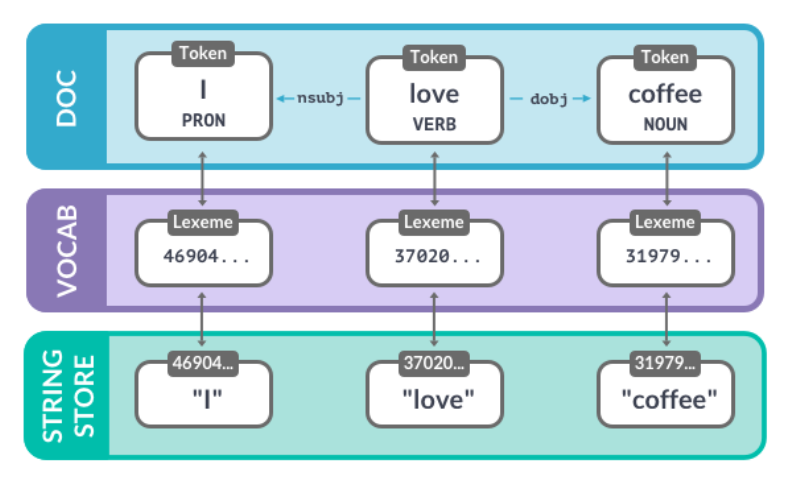

Here's an example.

- The `Doc` contains words in context – in this case, the tokens "I", "love" and "coffee" with their part-of-speech tags and dependencies.

- Each token refers to a lexeme, which knows the word's hash ID. To get the string representation of the word, spaCy looks up the hash in the string store.
